In [1]:
import json
import os
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import tarfile
import pickle
import numpy as np
from tqdm import tqdm
import cv2

path = "tsinghuaDaimlerDataset"

In [33]:
#extract images or labels
# open file
file = tarfile.open('leftImg8bit_train.tar.gz')
# extracting file
file.extractall('tsinghuaDaimlerDataset/images_train')
file.close()

In [148]:
# create bbox from label
def create_bbox(path) : 
    for _, _, fnames in sorted(os.walk(path+"/label")): #for each folder
        for fname in fnames :
            with open(path+"/label/"+fname) as json_file:
                im = json.load(json_file)
            bbox = {"y": im["children"][0]["minrow"], "x": im["children"][0]["mincol"], "w": (im["children"][0]["maxcol"]), "h": im["children"][0]["maxrow"]}
            with open(path +"/bbox2/"+ os.path.splitext(im["imagename"])[0]+".json", "w") as outfile:
                json.dump(bbox, outfile)
create_bbox(path)

(1024, 4096, 3)
{'y': 396, 'x': 630, 'w': 722, 'h': 523}


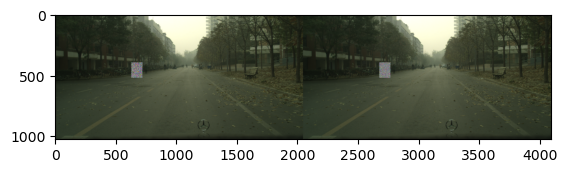

(1024, 4096, 3)


In [9]:
image = mpimg.imread("tsinghuaDaimlerDataset/images_aligned/images/train/tsinghuaDaimlerDataset_2014-11-20_074640_000000000_leftImg8bit.png")
plt.imshow(image)
print(image.shape)

with open("tsinghuaDaimlerDataset/images_aligned/bbox/train/tsinghuaDaimlerDataset_2014-11-20_074640_000000000_leftImg8bit.json" ) as json_file:
    bbox = json.load(json_file)
print(bbox)

roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 
noise = np.random.randint(0, 2, roi.shape, dtype=np.uint8)
image_noise = image
image_noise[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

plt.imshow(image_noise)
plt.show()

print(image.shape)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


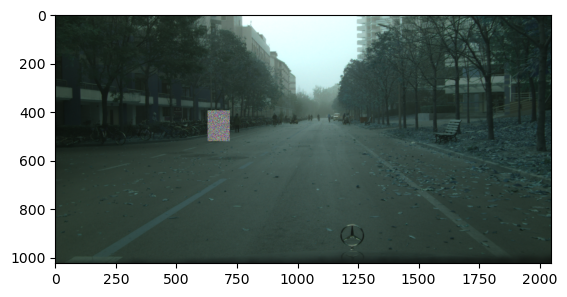

In [30]:
def replace_plastics_with_noise(path_images, path_bounding_boxes):
    # Iterate over the bounding boxes
    for _, _, fnames in sorted(os.walk(path_images)): 
        for fname in tqdm(fnames[0:1]) :
        
            image = cv2.imread(path_images + fname,1)

            with open(path_bounding_boxes + os.path.splitext(fname)[0] + ".json" ) as json_file:
                bbox = json.load(json_file)
            
            roi = image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] 

            # Generate random noise
            noise = np.random.randint(0, 256, roi.shape, dtype=np.uint8)

            # Replace the ROI with random noise
            image[bbox["y"]:bbox["h"], bbox["x"]:bbox["w"]] = noise

            plt.imshow(image)

            im_path = path + "/images_noise/train/"+ fname
            cv2.imwrite(im_path, image)

replace_plastics_with_noise( path + "/images_full/train/", path + "/bbox2/")